In [2]:
# import data
import pandas as pd
import numpy as np


df = pd.read_csv('titanic.csv')
df.head(5) # select top 5 * from df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# duplicate passenger // survive: song sot // sibsp, parch: hanh ly, ng di theo, embarked: cang khoi hanh, pclass: hang ve

df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

Khao sat du lieu

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# age : float vi cot nay co gia tri null

df.isna().sum()

# xem ty le null

df.isna().sum() * 100 / len(df) 

# bo carbin, embarked: dien gtri lon nhat, age: phan nho tung nhom
# fill null = trung binh/ trung vi theo vung du lieu \\ xet theo tung cum nho co su tuong dong
# fillnull dang time series : khong fill theo median/ trung vi ( khoang interval : trung binh || 10 gia tri nam dau nam cuoi lay trung binh)
# du lieu theo tinh chu ky -> forward back or forward  \\ trung binh, trung vi 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

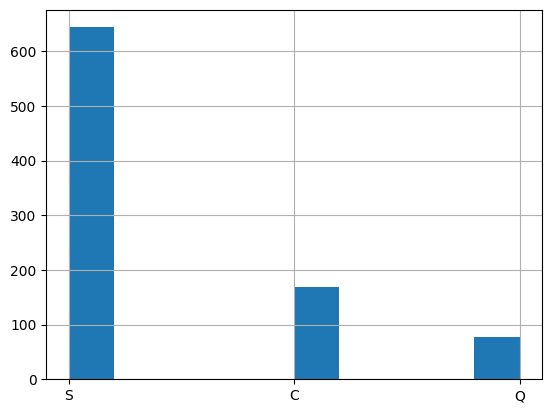

In [14]:
# fill null Embarked
df.Embarked.hist()


In [ ]:
df.Embarked.mode()[0]      # gia tri xuat hien nhieu nhat, so ) lay gtri dau tien


'S'

In [17]:
df['Embarked'].fillna(df.Embarked.mode()[0], inplace=True)

<Axes: >

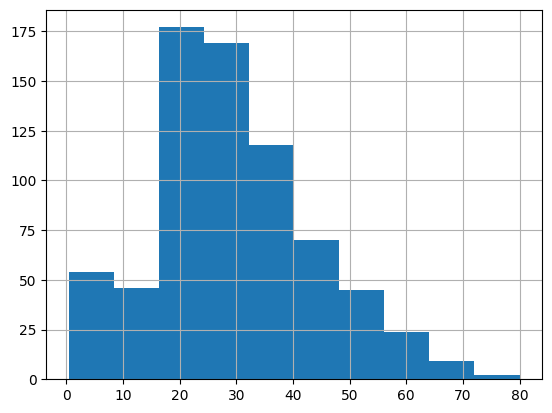

In [ ]:
# fill null cot Age
df.Age.hist()

# nen fill = median vi du lieu kp phaan phoi chuan

In [19]:
df.fillna(df.Age.median(), inplace=True)

In [20]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
# check duplicate
df['PassengerId'].duplicated().sum()

np.int64(0)

Thong ke du lieu

In [ ]:
# df imbalance: chenh lech 2 nhan du lieu
df.columns
# survived: dau ra 0,1 => hanh khach con song hay khong , 0: song, 1: chet

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

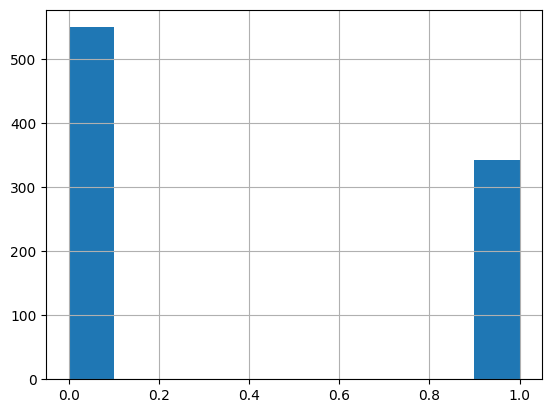

In [ ]:
# check imbalance : qtrong vi co su chenh lech, de bi bias du lieu
df.Survived.hist()

Correlation

In [ ]:
# df.corr() # chỉ hoạt động trên dữ liệu dạng số => biến đổi để dùng nhưng trong dữ liệu dạng titanic này không nên dùng vì corr để phản ánh tuyến tính nên k phù hợp (cái này tăng, cái kia tăng)

Encodeing data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# encode: sex(0,1) label encoder - phu hop voi giá trị nhị phân ;
# sex: mapping "female": 0 , "male": 1  -- category cột để encoding
# embrake: S, C, Q  -- khong mag tinh thứ bậc => one - hot encodeing  (pandas.get_dummy) -- category cột để encoding
# Pclass: 0 -> 1 <=> 0 0.5 1
# age: min max để scale về 0, 1
# SibSp, Peach, ticket: min max, standard scaler
